In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Confidence INtervals

In [2]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


How can we see a distribution of maternal ages?

<details>
<summary>Solution</summary>
  births.hist('Maternal Age')
</details>  

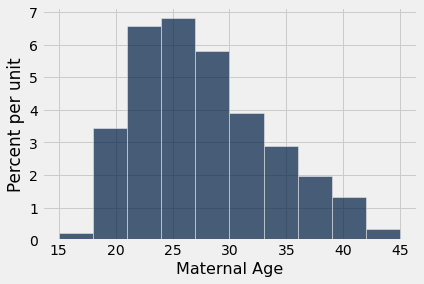

In [4]:
births.hist('Maternal Age')

What is the mean age?

In [6]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [7]:
births.num_rows

1174

In [19]:
sample_births = births.sample(300, with_replacement=False)
sample_births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
63,236,24,58,99,False
115,276,18,63,110,False
126,262,37,66,135,True
99,274,28,66,118,True
115,302,28,64,116,False
125,290,36,59,105,False
75,239,26,63,124,True
130,285,23,63,128,True
117,293,39,60,120,True
129,274,33,69,136,True


Now let's use bootstraping to find samples means

<details>
<summary>Solution</summary>
  np.mean(births.sample().column('Maternal Age'))
</details>  

In [20]:
def one_bootstrap_mean():
    resample = sample_births.sample(with_replacement=True)
    return np.mean(resample.column('Maternal Age'))


In [23]:
one_bootstrap_mean()

27.17

Let's compute 1k bootstrapped samples

In [24]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

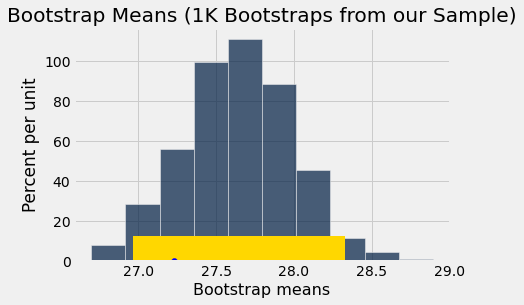

In [26]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=50, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');

In [29]:
left, right, mean_age

(26.966666666666665, 28.33, 27.228279386712096)

## Is this technique reliable?


Repeat this process 100 times and keep track of how many times the true population parameter was indeed in this interval

*Run this before discussing it because it will take about a minute to run*

In [43]:
%%time
# This will take a while to run
intervals = Table().with_columns('Lower', make_array(), 'Upper', make_array())

for i in np.arange(100):
    sample_from_pop = births.sample(300, with_replacement=False)
    means = make_array()
    
    for j in np.arange(1000):
        resample = sample_from_pop.sample(with_replacement=True)
        mean = np.average(resample.column('Maternal Age'))
        means = np.append(means, mean)
        
    interval = make_array(
                percentile(25, means), 
                percentile(75, means))
    
    intervals.append(interval)

CPU times: user 53.1 s, sys: 26.3 ms, total: 53.1 s
Wall time: 53 s


Now let's check how many times our intervals included the true parameter

In [35]:
mean_age

27.228279386712096

In [44]:
intervals

Lower,Upper
27.34,27.7767
26.32,26.7767
26.37,26.8267
27.02,27.4567
27.1167,27.5933
26.9667,27.3867
27.0567,27.53
26.5167,26.9433
26.67,27.1433
26.71,27.19


In [45]:
true_mean = np.average(births.column('Maternal Age'))
intervals.where('Lower', are.not_above(true_mean)).where('Upper', are.not_below(true_mean)).num_rows

59

In [ ]:
true_mean, intervals

**Question:** How many times was the true mean below our lower bound?

<details>
<summary>Solution</summary>
    intervals.where('Lower', are.above(true_mean))
</details>   

In [40]:
intervals.where('Lower', are.above(true_mean))

Lower,Upper
27.49,28.8967
27.25,28.71


**Question:** How many times was the true mean above our upper bound?

<details>
<summary>Solution</summary>
    intervals.where('Upper', are.below(true_mean))
</details>   

In [42]:
intervals.where('Upper', are.below(true_mean))

Lower,Upper
25.9633,27.2167


(back to slides)
# Averages/Means

In [46]:
values = make_array(2, 3, 3, 9)
values

array([2, 3, 3, 9])

#### Different ways to compute the average

Sum of the values divided by the number of values
<details>
<summary>Solution</summary>
  sum(values)/len(values)
</details>

In [47]:
sum(values) / len(values)

4.25

Numpy methods

<details>
<summary>Solution</summary>
  np.mean(values), np.average(values)
</details>

In [48]:
np.mean(values), np.average(values)

(4.25, 4.25)

Multiply each value by a weight
<details>
<summary>Solution</summary>
  2*(1/4) + 3*(2/4) + 9*(1/4)
</details>

In [49]:
(2 * 1/4) + (3 * 1/2) + (9 * 1/4)

4.25

(back to slides)
#### Averages & Histograms

In [50]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


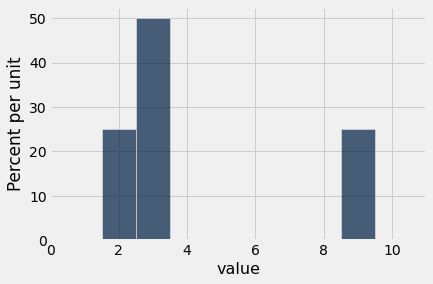

In [51]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

**Question:** Where is the average in the figure above?

**Question:** What if we add more values but keep the proportions the same?

In [ ]:
# Make array of 10 2s, 20 3s, and 10 9s

new_values = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)
Table().with_column('value', new_values).hist(bins = bins_for_display)
np.average(new_values)

(back to slides)
#### Which is bigger, mean or median?

(80, 79.06534653465347)

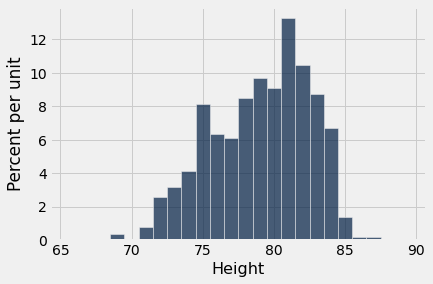

In [52]:
nba = Table.read_table('nba2013.csv')
nba
heights = nba.column('Height')
percentile(50, heights), np.mean(heights)

nba.hist('Height', bins=np.arange(65.5, 90.5))
percentile(50, heights), np.mean(heights)

(continue here even though we didnt cover this in slides, the slides will be review)
# Standard Deviation

In [53]:
values = make_array(2, 3, 3, 9)
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [54]:
np.mean(values)

4.25

In [55]:
values - 4.25

array([-2.25, -1.25, -1.25,  4.75])

**Question:** How far is each example from the mean?
    
<details>
<summary>Solution</summary>
  Compute the average value then subtract that by each value
</details>

<details>
    <summary> code</summary>
mean_value = np.mean(values) # Don't forget about step 1
deviations = values - mean_value # deviations from average, aka distance of each element from the average
sd_table = sd_table.with_column('Deviation', deviations)
sd_table
</details>

In [56]:
mean_value = np.mean(values) # Don't forget about step 1
deviations = values - mean_value # deviations from average, aka distance of each element from the average
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


**Question**: What is the typical deviation? What do we use to compute the "typical"?
<details>
<summary>Solution</summary>
  average. Let's take the average of the deviations
</details>

In [57]:
np.average(sd_table.column('Deviation'))

0.0

**Question**: Average is the sum divided by the number of examples. What is the sum of these deviations?
<details>
<summary>Solution</summary>
  sum(deviations)
</details>

We care about the size of the deviation.

We've use `abs()` to find the size before, but here we will take the square value of the deviations

In [58]:
deviations ** 2

array([ 5.0625,  1.5625,  1.5625, 22.5625])

In [59]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


Variance of the data is the average of these squared deviations


In [60]:
variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

Standard Deviation (SD) is the square root of the variance

The square root gets us back to the same units as in the data

In [61]:
sd = variance ** 0.5
sd

2.7726341266023544

#### Computing std in numpy 

In [62]:
np.std(values), np.mean(values)

(2.7726341266023544, 4.25)

(back to slides - review of Standard deviation)
# Chebyshev's Bound

In [ ]:
births = Table.read_table('baby.csv')
births.show(3)

In [ ]:
births.hist()

Let's set overlay = False

In [ ]:
births.drop("Maternal Smoker").hist(overlay = False)

For now, lets look at Maternal Pregnancy Weight

In [ ]:
mpw = births.column("Maternal Pregnancy Weight") # Get the column
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

In [ ]:
std_lower = mean - (3*sd)
std_upper = mean + (3*sd)

Let's find all the examples that are within 3 SDs of the mean:

<details>
<summary>Solution</summary>
  births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))
</details>


In [ ]:
within_3_SDs = ...
within_3_SDs

Chebyshev's bound tells us that the proportion should be at least


In [ ]:
1 - 1/(3**2)

**Question:** What is the proportion within 3 SDs of the mean?

<details>
<summary>Solution</summary>
  within_3_SDs.num_rows / births.num_rows
</details>

Let's see if Chebyshev's bounds work for distributions with various shapes for the different columns

Let's comment the code together before we run it

In [ ]:
for feature in births.labels:       # What does this line do?
    values = births.column(feature) # What does this line do?
    mean = np.mean(values) # What does this line do?
    sd = np.std(values) # What does this line do?
    print() # What does this line do?
    print(feature) # What does this line do?
    for z in make_array(2, 3, 4, 5): # What does this line do?
        # What does the line below?
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        # What does the line below?
        proportion = chosen.num_rows / births.num_rows
        # What does the line below?
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')

(back to slides)
# Standard Units

Lets create a function where given a list of values called `x`, we want to return a list of standard units.

<details>
<summary>Solution</summary>
  return (x - np.mean(x)) / np.std(x)
</details>

Remember: `z = (value - average)/SD`

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [ ]:
curr_values = make_array(2, 3, 3, 9)
standard_units(curr_values), np.average(curr_values), np.std(curr_values)

Let's now convert the values in the `Maternal Age` column in the `births` table to standard units

In [ ]:
births.column('Maternal Age')

In [ ]:
ages = births.column('Maternal Age') # get the column
ages_standard_units = standard_units(ages) # convert the column to standard units 
ages_standard_units

**Question:** What was the original mean and std of the ages?

In [ ]:
#np.mean()

**Question:** What is the new mean and std of the ages?

*Let's answer this before we run the cell below*

In [ ]:
np.mean(ages_standard_units), np.std(ages_standard_units)

Let's put ages and the ages as standard units into a table called `both`

In [ ]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

(back to slides) - Question in the slides 

**Question:** What is the  mean and std of the ages?

<details>
<summary>Solution</summary>
  np.mean(ages), np.std(ages)
</details>

In [ ]:
np.mean(ages), np.std(ages)

Let's now plot the histograms of the ages and the ages in standard units

In [ ]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

In [ ]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

(back to slides)
# The SD and Bell Shaped Curves

It's hard to tell the SD from the histogram above.

Instead, lets look at the heights of the mothers.

In [ ]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))

**Question:** Where would we guess the average is?

**Question:** Where is the point of inflection?

**Hint Question:** What do we mean by *point of inflection*?

<details>
<summary>Solution</summary>
  start at the top of the curve and look towards the right. Notice that there is a place where the curve changes from looking like an "upside-down cup" to a "right-way-up cup"; formally, the curve has a point of inflection. That point is one SD above average. 
</details>


Now let's check the mean and std by running the code below 

In [ ]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

Lets compute the range of 1 STD

In [ ]:
np.mean(heights) + np.std(heights), np.mean(heights) - np.std(heights)

Let's look at another example.

From the above plots, which histograms look like a bell curve?

In [ ]:
# Solution below





















births.hist('Birth Weight') #, bins = np.arange(56.5, 72.6, 1))

**Question:** What's the average and whats the std?

In [ ]:
np.mean(births.column('Birth Weight')), np.std(births.column('Birth Weight'))

(back to slides)
# Correlation

In [ ]:
galton = Table.read_table('galton.csv')
galton.show(5)

Let's make a table that just has the heights

<details>
<summary>Solution</summary>
  'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
</details>

In [ ]:
heights = Table().with_columns(
    ...
    ...
    )
heights

Let's show a scatter plot where MidParent is on the x-axis

In [ ]:
heights.scatter('MidParent')

Now let's predict the child's height based on the average of the parents' height

**Question:** What type of trend do we see?

Let's look at another table

In [ ]:
hybrids = Table.read_table('hybrid.csv')
hybrids.show(5)

**Question:** Is there an association between `acceleration` and `mpg`?

In [ ]:
hybrids.select("mpg", "acceleration").scatter("mpg")

**Question:** What does this plot show?

**Question:** What about `mpg` and price`?

In [ ]:
hybrids.select("msrp", "acceleration").scatter("msrp")

**Question:** Do we see the same trends with standard units?

In [ ]:
# Steps:
# 1. convert each column to their own standard units
# 2. store the standard unit columns
# 3. show a histogram with the standard units